In [1]:
%matplotlib inline
import pymc3 as pm
from simpanel.glm import Glm
import pandas as pd

In [2]:
data = pd.read_csv('tests/data/testdata.csv')

In [3]:
data.head()

,SOI_1_Ygr,US_gov_yield,REER,GB_USGB,d-unempl-4q,Country
0,0.0,2.128232,-0.016129,4.756667,-0.3,Australia
1,0.0,2.163323,-0.003005,4.886667,0.2,Australia
2,0.0,2.163323,0.005982,4.723333,1.1,Australia
3,0.0,2.128232,-0.057629,4.153333,1.9,Australia
4,0.0,2.079442,-0.055513,3.460000,2.6,Australia


In [4]:
aus = data.ix[data.Country=='Australia', :-1]

In [5]:
aus.head()

,SOI_1_Ygr,US_gov_yield,REER,GB_USGB,d-unempl-4q
0,0.0,2.128232,-0.016129,4.756667,-0.3
1,0.0,2.163323,-0.003005,4.886667,0.2
2,0.0,2.163323,0.005982,4.723333,1.1
3,0.0,2.128232,-0.057629,4.153333,1.9
4,0.0,2.079442,-0.055513,3.460000,2.6


In [6]:
with pm.Model() as model:
    g = Glm.from_xy(aus.iloc[:,1:], aus.iloc[:,0])
    fit = g.advi()

Applied log-transform to sd and added transformed sd_log_ to model.
WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Iteration 0 [0%]: ELBO = -753.22
Iteration 500 [10%]: Average ELBO = -1521.08
Iteration 1000 [20%]: Average ELBO = -937.2
Iteration 1500 [30%]: Average ELBO = -690.54
Iteration 2000 [40%]: Average ELBO = -694.91
Iteration 2500 [50%]: Average ELBO = -416.11
Iteration 3000 [60%]: Average ELBO = -333.79
Iteration 3500 [70%]: Average ELBO = -269.28
Iteration 4000 [80%]: Average ELBO = -266.98
Iteration 4500 [90%]: Average ELBO = -239.16
Finished [100%]: Average ELBO = -221.25


In [7]:
g.advifit

ADVIFit(means={'d-unempl-4q': array(0.007270637782328267), 'US_gov_yield': array(-0.007239441644718906), 'sd_log_': array(0.4422908160335888), 'GB_USGB': array(-0.012131387594081517), 'REER': array(-0.01630973360707134)}, stds={'d-unempl-4q': 0.46645466436928656, 'US_gov_yield': 0.51277963323044329, 'sd_log_': 0.48918351701740048, 'GB_USGB': 0.47700394069231189, 'REER': 1.0287772509429498}, elbo_vals=array([ -753.22177205, -6620.87456303,  -242.89202978, ...,  -225.57205097,
        -247.77633965,  -241.29816452]))

In [8]:
with model:
    trace = g.nuts()

100%|██████████| 300/300 [00:30<00:00,  9.80it/s]


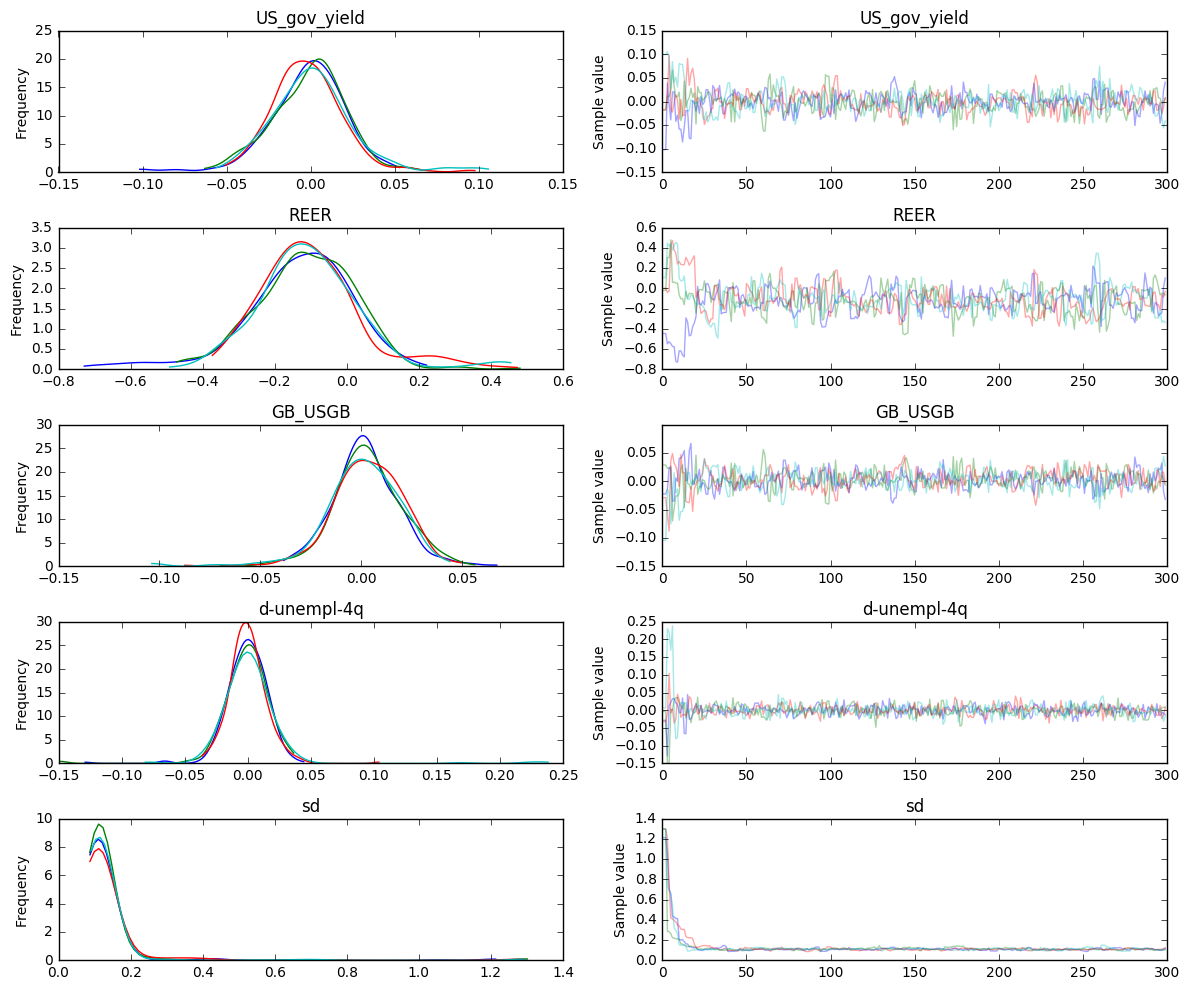

In [9]:
pm.traceplot(trace);

In [10]:
g.trace

<MultiTrace: 4 chains, 300 iterations, 6 variables>